<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/lesssion_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_path = 'drive/My Drive/data'
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
! mkdir -p ~/.kaggle/

In [0]:
! mv kaggle.json ~/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [0]:
! ls '/content/drive/My Drive'

'Colab Notebooks'   data  'Getting started.pdf'   kaggle.json


In [0]:
! cp '/content/drive/My Drive/kaggle.json' ~/.kaggle

In [4]:
path = Config.data_path()/'plant'
path.mkdir(parents=True,exist_ok=True)
path

PosixPath('/root/.fastai/data/plant')

In [0]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f 'train-jpg.tar.7z' -p {path}  
# ! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv/train_v2.csv -p {path}  
! unzip -q -n {path}/train_v2.csv.zip -d {path}

404 - Not Found


In [0]:
! cp {path}/'train_v2.csv'  

--2020-01-13 08:33:54--  https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download-directory/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain-jpg.tar
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.kaggle.com/account/login?ReturnUrl=%2Fc%2Fplanet-understanding-the-amazon-from-space%2Fdownload-directory%2FfBesYSh7qE3PuxXtB1SS%252Fversions%252FDMmq3a6XjGpH6e8EUe3c%252Fdirectories%252Ftrain-jpg.tar [following]
--2020-01-13 08:33:54--  https://www.kaggle.com/account/login?ReturnUrl=%2Fc%2Fplanet-understanding-the-amazon-from-space%2Fdownload-directory%2FfBesYSh7qE3PuxXtB1SS%252Fversions%252FDMmq3a6XjGpH6e8EUe3c%252Fdirectories%252Ftrain-jpg.tar
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘

In [0]:
! 7za -bd -y -so x '/content/drive/My Drive/data/lession3/train-jpg.tar.7z' | tar xf - -C {path.as_posix()}

In [12]:
! ls {path}

train-jpg  train-jpg.tar.7z  train_v2.csv


In [0]:
! cp '/content/drive/My Drive/data/lession3/train-jpg.tar.7z' {path}

In [0]:
! cp '/content/drive/My Drive/data/lession3/train_v2.csv' {path}

In [0]:
! 7za -bd -y -so x '/content/drive/My Drive/data/lession3/train-jpg.tar.7z' | tar xf - -C {path.as_posix()}

In [0]:
df = pd.read_csv(path/'train_v2.csv')

In [14]:
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True,max_lighting=0.1,max_zoom=1.05,max_warp=0.)

In [0]:
np.random.seed(42)

In [0]:
src = (ImageList.from_csv(path,'train_v2.csv',folder='train-jpg',suffix='.jpg')
        .split_by_rand_pct(0.2)
        .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms,size=128).databunch().normalize(imagenet_stats))

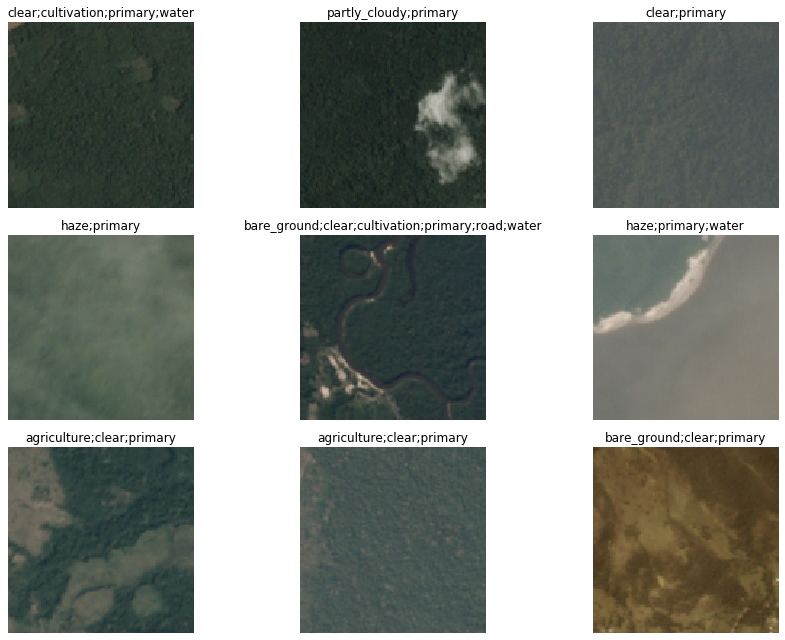

In [19]:
data.show_batch(rows=3,figsize=(12,9))

In [0]:
arch = models.resnet50

In [21]:
acc_02 = partial(accuracy_thresh,thresh=0.2)
f_score = partial(fbeta,thresh=0.2)
learn = cnn_learner(data,arch,metrics=[acc_02,f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 149MB/s] 


In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


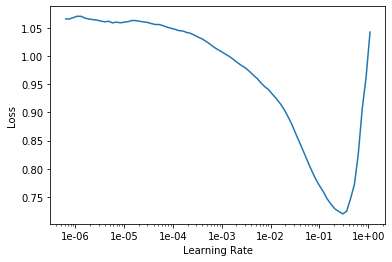

In [23]:
learn.recorder.plot()

In [24]:
# lr = 1e-2/2
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.135106,0.115258,0.942318,0.900716,02:25
1,0.115914,0.101985,0.948959,0.910648,02:24


In [0]:
learn.save('stage-1-rn50')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


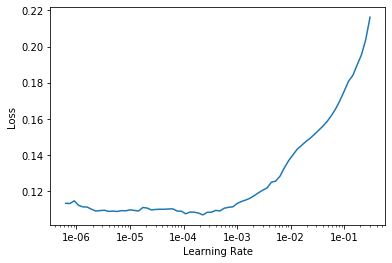

In [27]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-03

In [29]:
learn.fit_one_cycle(2,slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.105036,0.094103,0.954031,0.917604,02:32
1,0.098296,0.089823,0.955877,0.921820,02:31


In [0]:
learn.save('stage-2-rn50')

In [31]:
data = (src.transform(tfms,size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
learn.freeze()

In [34]:
doc(learn.freeze)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


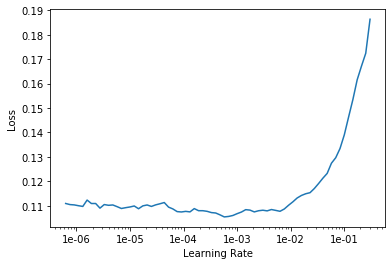

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
lr = 1e-4/2
learn.fit_one_cycle(2,slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.106862,0.095453,0.954845,0.915777,04:19
1,0.102771,0.094386,0.954591,0.916753,04:17


In [0]:
learn.save('stage-1-256-rn50')

In [0]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(1,slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.095151,0.088913,0.954903,0.922676,04:38


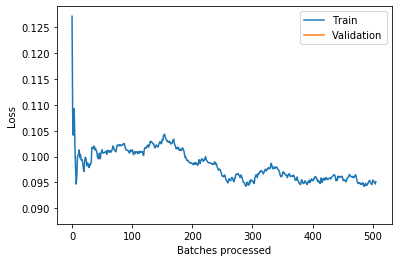

In [40]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

In [0]:
learn.export()